# Setup environment

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from bargaining_utility_functions import (import_bayaka, import_agta, 
                                          grid_search, grid_search_overdispersion, 
                                          objective_overdispersion,
                                          dynamic_solve)

from bargaining_visualization_functions import (analyze_grid,
                                          analyze_grid_simple, estimated_leisure_distribution,
                                          visualize_predictive_dist, visualize_predictive_dist_residuals)

# Generative model estimation procedure

## Bayaka dataset

Running the grid search is computationally costly. On my machine it takes about half an hour. So I've commented out the grid search for the moment. Instead, I have saved the results of a previous grid search called `likelihoods_table_darwin_stick_counts_bayaka.csv`. This code reads the old grid search and displays the best parameter values.

If you would like to run the whole analysis from scratch, just uncomment out the grid search and comment out the `read_csv()` function.

The strategy for estimating this model is to optimize each parameter and then cycle through the parameters until none of them move anymore. This strategy mirrors cyclical descent algorithms. However, we found that the likelihood surface is not asympotic. So standard cyclical descent algorithms can search for a very long time in rugged regions of the parameter space. To overcome this problem, we did a two-dimensional grid search over `a` and `b` at the same time. This allowed us to find the maximium likelihood point on a rugged terrain. The `d` parameter is better behaved and asympotic. So we treated it independently. 

First, find the maximium likelihood pair of parameters for `a` and `b`, ignoring dispersion for the moment.

In [2]:
bayaka_data = import_bayaka()
a_grid = np.linspace(-0.6,0.15,101)
b_grid = np.linspace(-0.1,0.15,251)

In [3]:
# mle = grid_search(a_grid,b_grid,bayaka_data,True)
# mle.to_csv("likelihoods_table_darwin_stick_counts_bayaka.csv")

In [4]:
mle = pd.read_csv("likelihoods_table_darwin_stick_counts_bayaka.csv",index_col=0)
best = mle.max().max()
mle[mle.isin([best])].stack()

-0.0375  0.015   -116.929001
-0.0300  0.015   -116.929001
         0.016   -116.929001
-0.0225  0.015   -116.929001
         0.016   -116.929001
 0.0225  0.017   -116.929001
 0.0300  0.018   -116.929001
         0.019   -116.929001
 0.0375  0.017   -116.929001
         0.018   -116.929001
         0.019   -116.929001
 0.0450  0.017   -116.929001
 0.0525  0.017   -116.929001
 0.0600  0.017   -116.929001
 0.0675  0.017   -116.929001
 0.0750  0.017   -116.929001
 0.0825  0.016   -116.929001
         0.017   -116.929001
 0.0900  0.016   -116.929001
         0.017   -116.929001
 0.0975  0.016   -116.929001
         0.017   -116.929001
 0.1050  0.016   -116.929001
         0.017   -116.929001
 0.1125  0.016   -116.929001
         0.017   -116.929001
 0.1200  0.016   -116.929001
         0.017   -116.929001
 0.1275  0.016   -116.929001
 0.1350  0.016   -116.929001
 0.1425  0.016   -116.929001
 0.1500  0.016   -116.929001
dtype: float64

Second, maximize the likelihood along the dispersion parameter.

best d: 11


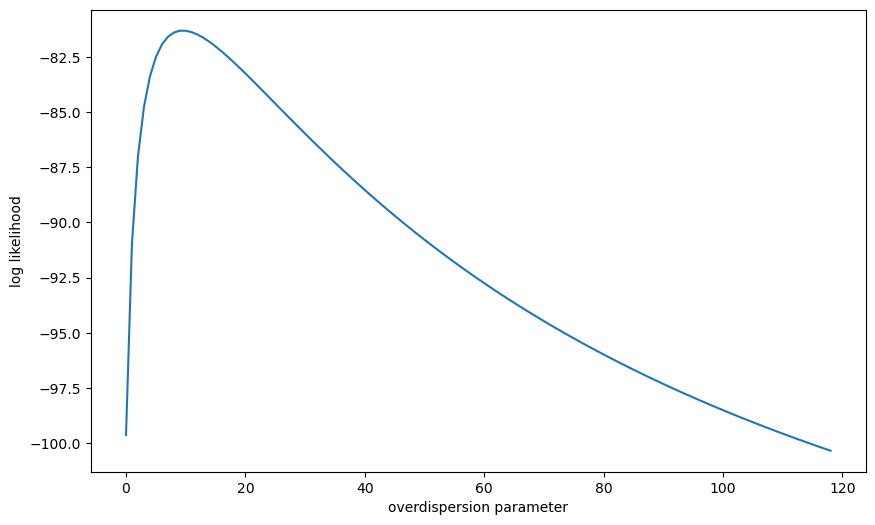

In [5]:
ds = np.arange(1,120)

logpdfs_along_d = [objective_overdispersion(-0.0375,0.016,d,bayaka_data) for d in ds]

best = max(logpdfs_along_d)
best_index = logpdfs_along_d.index(best)
best_d = ds[best_index]
print("best d:",best_d)

plt.plot(logpdfs_along_d)
plt.xlabel('overdispersion parameter')
plt.ylabel('log likelihood');

Because a range of intercepts all have equal log likelihood, we check whether the choice of particular mle points  matters to `d`. It doesn't. These three graphs are identical.

best d: 11


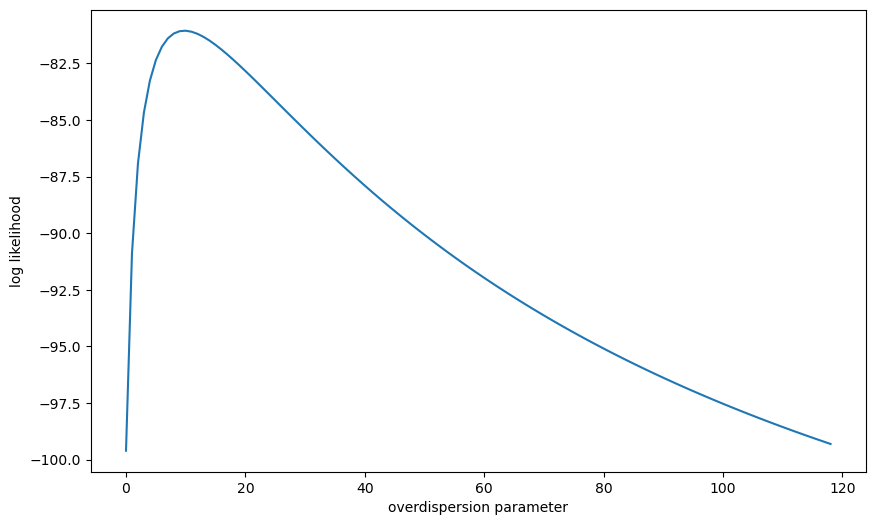

In [6]:
ds = np.arange(1,120)

logpdfs_along_d = [objective_overdispersion(0.1500,0.016,d,bayaka_data) for d in ds]

best = max(logpdfs_along_d)
best_index = logpdfs_along_d.index(best)
best_d = ds[best_index]
print("best d:",best_d)

plt.plot(logpdfs_along_d)
plt.xlabel('overdispersion parameter')
plt.ylabel('log likelihood');

best d: 11


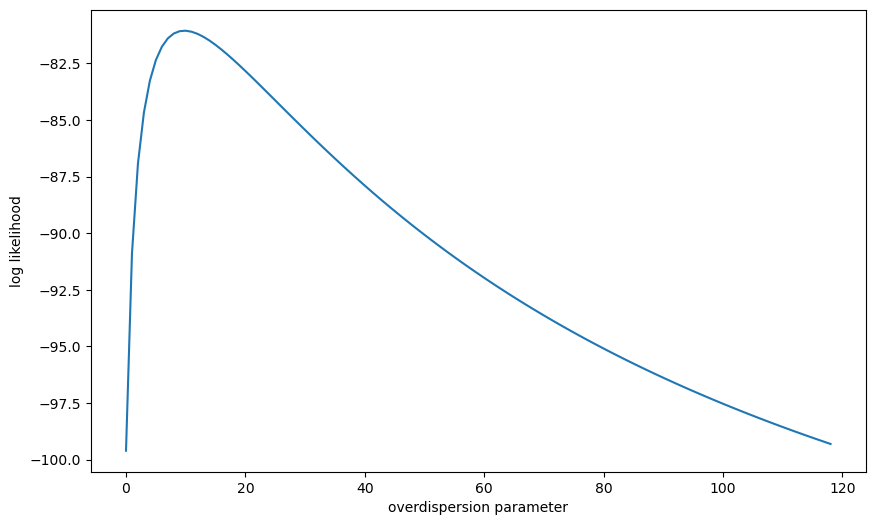

In [7]:
ds = np.arange(1,120)

logpdfs_along_d = [objective_overdispersion(0.0375,0.019,d,bayaka_data) for d in ds]

best = max(logpdfs_along_d)
best_index = logpdfs_along_d.index(best)
best_d = ds[best_index]
print("best d:",best_d)

plt.plot(logpdfs_along_d)
plt.xlabel('overdispersion parameter')
plt.ylabel('log likelihood');

Fourth, we re-estimate the `a` and `b` parameters but fixing our `d` parameter at 11.

In [8]:
# mle = grid_search_overdispersion(a_grid,b_grid,best_d,bayaka_data,False)
# mle.to_csv("likelihoods_table_darwin_stick_counts_bayaka_dispersion.csv")

In [9]:
mle = pd.read_csv("likelihoods_table_darwin_stick_counts_bayaka_dispersion.csv",index_col=0)
best = mle.max().max()
mle[mle.isin([best])].stack()

-0.0375  0.015   -81.062395
-0.0300  0.015   -81.062395
         0.016   -81.062395
-0.0225  0.015   -81.062395
         0.016   -81.062395
 0.0225  0.017   -81.062395
 0.0300  0.018   -81.062395
         0.019   -81.062395
 0.0375  0.017   -81.062395
         0.018   -81.062395
         0.019   -81.062395
 0.0450  0.017   -81.062395
 0.0525  0.017   -81.062395
 0.0600  0.017   -81.062395
 0.0675  0.017   -81.062395
 0.0750  0.017   -81.062395
 0.0825  0.016   -81.062395
         0.017   -81.062395
 0.0900  0.016   -81.062395
         0.017   -81.062395
 0.0975  0.016   -81.062395
         0.017   -81.062395
 0.1050  0.016   -81.062395
         0.017   -81.062395
 0.1125  0.016   -81.062395
         0.017   -81.062395
 0.1200  0.016   -81.062395
         0.017   -81.062395
 0.1275  0.016   -81.062395
 0.1350  0.016   -81.062395
 0.1425  0.016   -81.062395
 0.1500  0.016   -81.062395
dtype: float64

Finally, we check whether the dispersion parameter moves at all once we get the new maximium likelihood points for `a` and `b`.

best d: 11


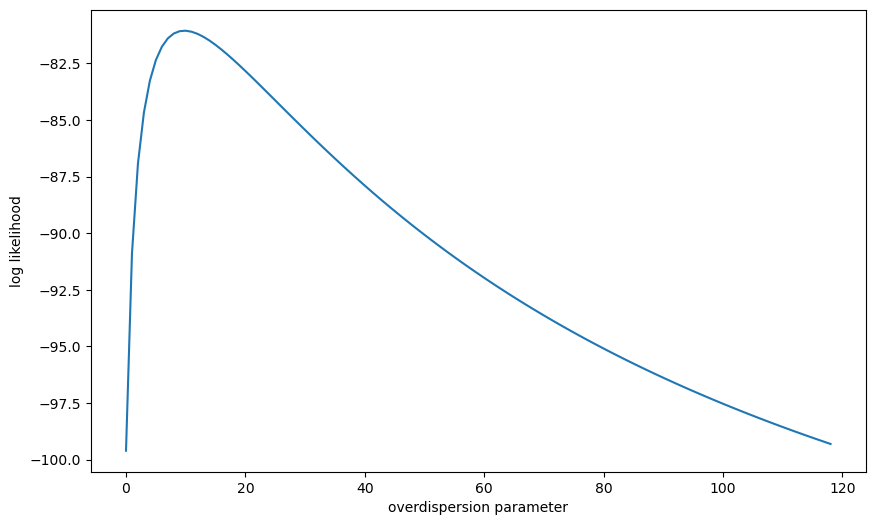

In [10]:
ds = np.arange(1,120)

logpdfs_along_d = [objective_overdispersion(-0.0375,0.015,d,bayaka_data) for d in ds]

best = max(logpdfs_along_d)
best_index = logpdfs_along_d.index(best)
best_d = ds[best_index]
print("best d:",best_d)

plt.plot(logpdfs_along_d)
plt.xlabel('overdispersion parameter')
plt.ylabel('log likelihood');

best d: 11


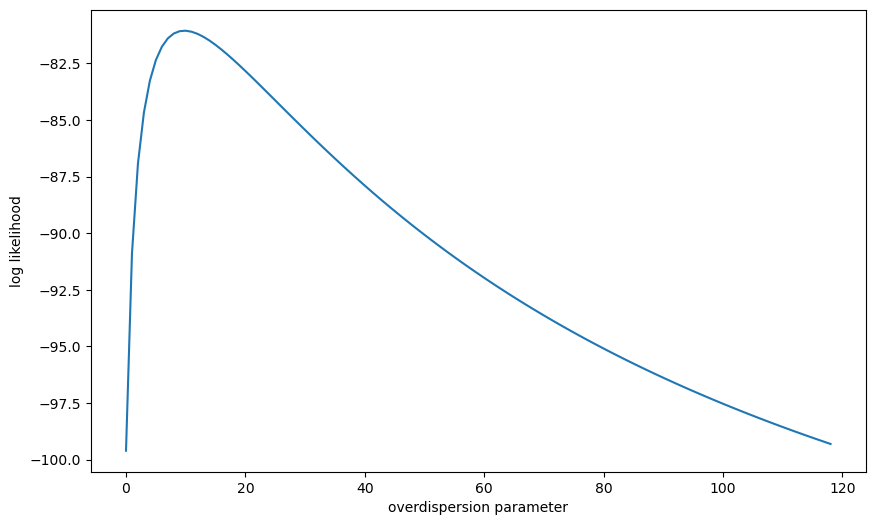

In [11]:
ds = np.arange(1,120)

logpdfs_along_d = [objective_overdispersion(0.15,0.016,d,bayaka_data) for d in ds]

best = max(logpdfs_along_d)
best_index = logpdfs_along_d.index(best)
best_d = ds[best_index]
print("best d:",best_d)

plt.plot(logpdfs_along_d)
plt.xlabel('overdispersion parameter')
plt.ylabel('log likelihood');

## BaYaka results

[[ 75  76  76  77  77  83  84  84  85  85  85  86  87  88  89  90  91  91
   92  92  93  93  94  94  95  95  96  96  97  98  99 100]] [[115 115 116 115 116 117 118 119 117 118 119 117 117 117 117 117 116 117
  116 117 116 117 116 117 116 117 116 117 116 116 116 116]]
a - 95% credible interval: [ -0.5625 0.105 ]
b - 95% credible interval: [ -0.066 0.135 ]
b - p value: 0.2513


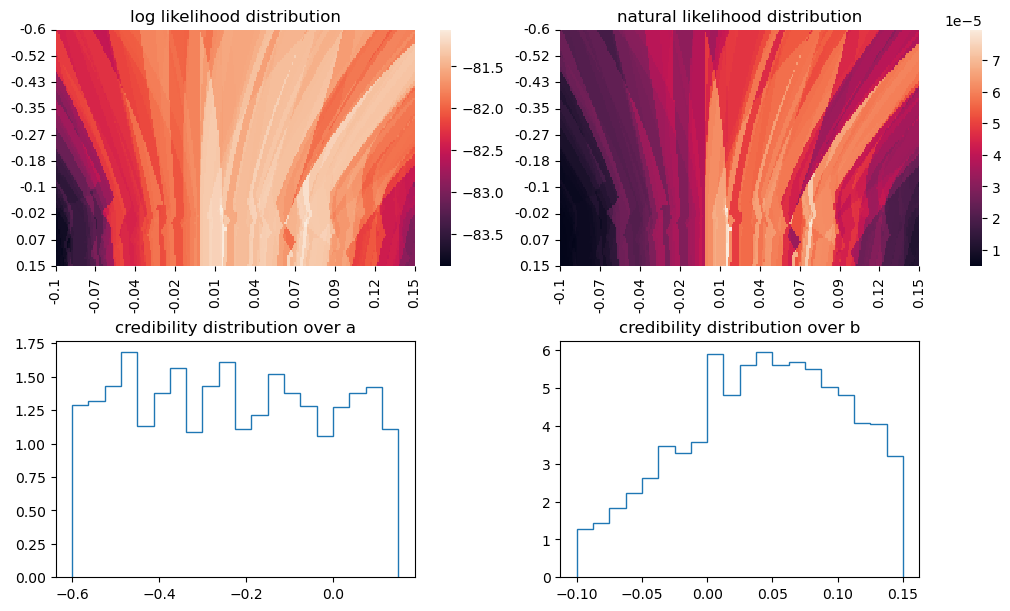

In [12]:
mle = pd.read_csv("likelihoods_table_darwin_stick_counts_bayaka_dispersion.csv",index_col=0)
f = analyze_grid(mle)

<Axes: title={'center': 'Joint likelihood distribution for parameters of the bargaining model'}, xlabel='Slope parameter', ylabel='Intercept parameter'>

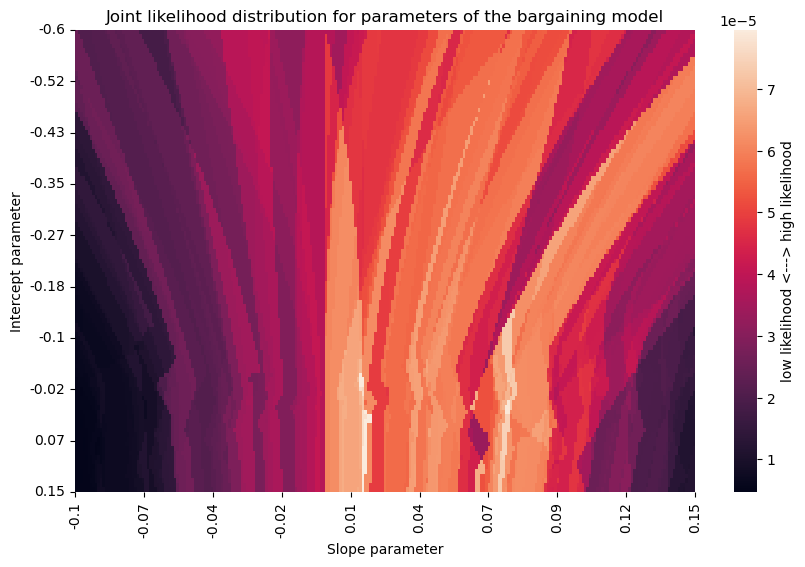

In [13]:
mle = pd.read_csv("likelihoods_table_darwin_stick_counts_bayaka_dispersion.csv",index_col=0)
analyze_grid_simple(mle)

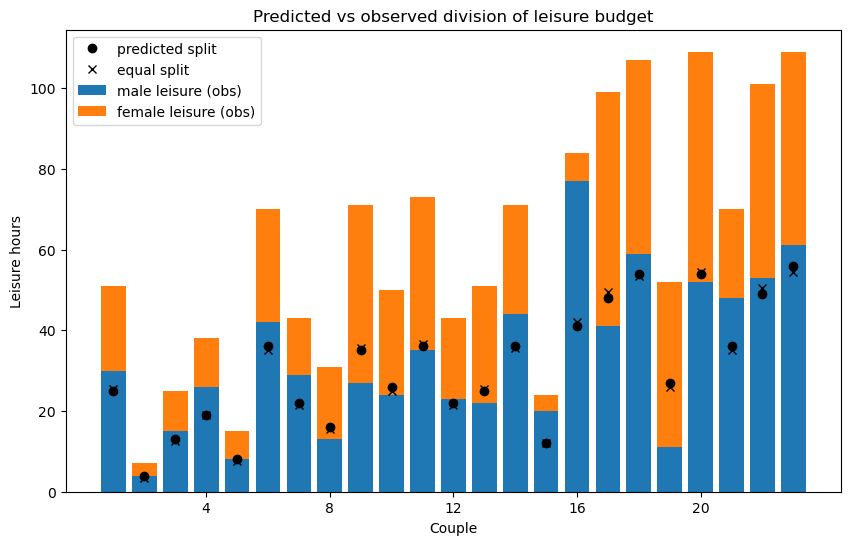

In [14]:
predicted_data = estimated_leisure_distribution(bayaka_data,-0.0375,0.019)
visualize_predictive_dist(predicted_data)

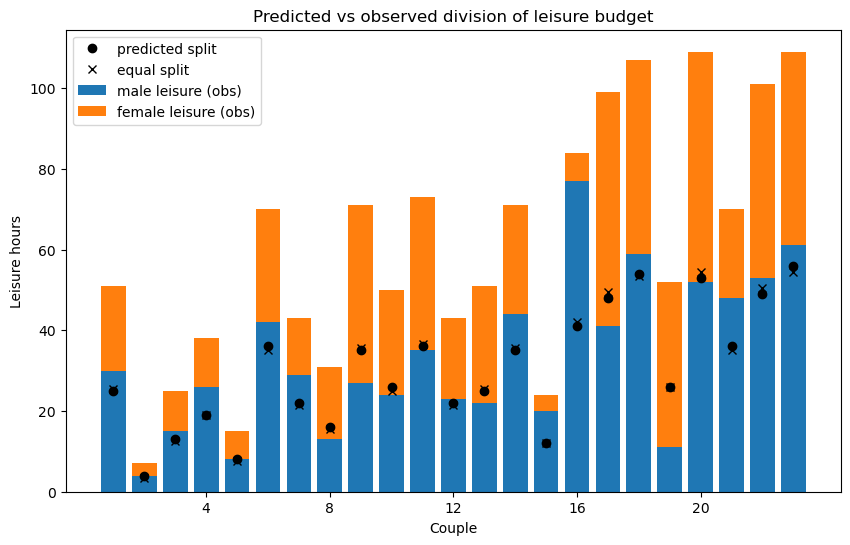

In [15]:
predicted_data = estimated_leisure_distribution(bayaka_data,-0.5,0.04)
visualize_predictive_dist(predicted_data)

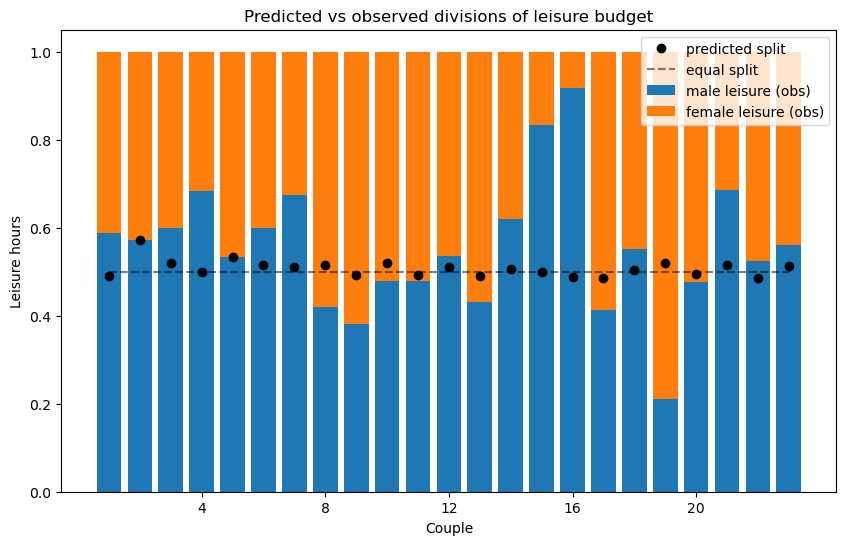

In [16]:
predicted_data = estimated_leisure_distribution(bayaka_data,-0.0375,0.019)
visualize_predictive_dist_residuals(predicted_data)

### Interpreting parameters for BaYaka

In [17]:
bayaka_data = import_bayaka()
bayaka_data.head()

,ID,agem,agefem,camp,male_relational,female_relational,leisurem_counts,leisuref_counts,budget,leisureratio,dependants,male_z_relational,female_z_relational
0,CML00201M060,26.25,29.37,0,1,4,30,21,51,0.534682,1,-0.880409,0.146735
1,CML00403M097,21.48,19.41,0,2,0,4,3,7,0.571429,1,-0.538028,-1.222790
2,CML00405M100,62.86,50.63,0,1,0,15,10,25,0.600000,3,-0.880409,-1.222790
3,CML00906M239,45.58,35.35,0,8,4,26,12,38,0.635403,5,1.516260,0.146735
4,CML00110M036,66.28,47.25,0,4,1,8,7,15,0.533333,5,0.146735,-0.880409


In [18]:
male_z_relational = bayaka_data.male_z_relational.values
female_z_relational = bayaka_data.female_z_relational.values
budget = bayaka_data.budget.values

dp1 = (-0.0375 + male_z_relational * 0.019)
dp2 = (-0.0375 + female_z_relational * 0.019)

current_predictions = np.array([dynamic_solve(dp1[i],dp2[i],budget[i]) for i in range(len(budget))])

dp1 = (-0.0375 + (male_z_relational + 1) * 0.019)
dp2 = (-0.0375 + female_z_relational * 0.019)

cf_predictions = np.array([dynamic_solve(dp1[i],dp2[i],budget[i]) for i in range(len(budget))])

dp1 = (-0.0375 + (male_z_relational) * 0.019)
dp2 = (-0.0375 + (female_z_relational + 1) * 0.019)

cf2_predictions = np.array([dynamic_solve(dp1[i],dp2[i],budget[i]) for i in range(len(budget))])

diff_in_leisure_for_men = cf_predictions - current_predictions
diff_in_leisure_for_women = cf2_predictions - current_predictions

diff_in_leisure_for_men[:,0].mean(), diff_in_leisure_for_women[:,1].mean()

(0.43478260869565216, 0.5217391304347826)

In [19]:
(diff_in_leisure_for_men[:,0].mean() + diff_in_leisure_for_women[:,1].mean()) / 2

0.4782608695652174

In [20]:
((cf_predictions[:,0] / budget) - (current_predictions[:,0] / budget)).mean()

0.005795997832204136

In [21]:
((cf2_predictions[:,1] / budget) - (current_predictions[:,1] / budget)).mean()

0.013429102011412663

In [22]:
(((cf_predictions[:,0] / budget) - (current_predictions[:,0] / budget)).mean() + ((cf2_predictions[:,1] / budget) - (current_predictions[:,1] / budget)).mean()) / 2

0.009612549921808398

## Agta dataset

In [23]:
agta_data = import_agta()
a_grid = np.linspace(-0.2,0.3,51)
b_grid = np.linspace(-0.15,0.5,101)

In [24]:
# mle = grid_search(a_grid,b_grid,agta_data,True)
# mle.to_csv("likelihoods_table_darwin_token_proportion_agta.csv")

In [25]:
mle = pd.read_csv("likelihoods_table_darwin_token_proportion_agta.csv",index_col=0)
best = mle.max().max()
mle[mle.isin([best])].stack()

-0.200  -0.055   -122.149698
-0.195  -0.055   -122.149698
        -0.052   -122.149698
-0.190  -0.055   -122.149698
        -0.052   -122.149698
-0.185  -0.052   -122.149698
-0.180  -0.052   -122.149698
-0.175  -0.052   -122.149698
-0.170  -0.052   -122.149698
-0.165  -0.052   -122.149698
-0.160  -0.052   -122.149698
-0.155  -0.052   -122.149698
        -0.049   -122.149698
-0.150  -0.052   -122.149698
        -0.049   -122.149698
-0.145  -0.052   -122.149698
        -0.049   -122.149698
-0.140  -0.052   -122.149698
        -0.049   -122.149698
-0.135  -0.052   -122.149698
        -0.049   -122.149698
-0.130  -0.052   -122.149698
        -0.049   -122.149698
-0.125  -0.052   -122.149698
        -0.049   -122.149698
-0.120  -0.049   -122.149698
-0.115  -0.049   -122.149698
-0.110  -0.049   -122.149698
-0.105  -0.049   -122.149698
        -0.046   -122.149698
-0.100  -0.049   -122.149698
        -0.046   -122.149698
-0.095  -0.049   -122.149698
        -0.046   -122.149698
-0.090  -0.049

best d: 96


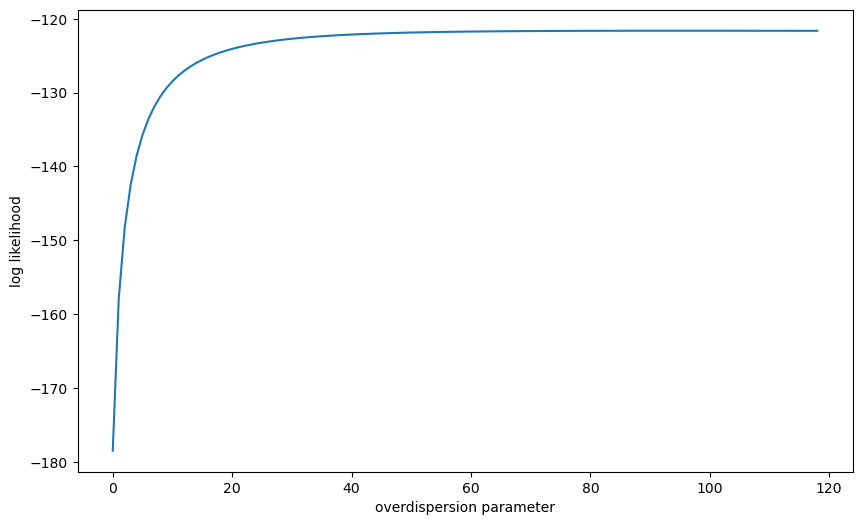

In [26]:
ds = np.arange(1,120)

logpdfs_along_d = [objective_overdispersion(-0.2,-0.055,d,agta_data) for d in ds]

best = max(logpdfs_along_d)
best_index = logpdfs_along_d.index(best)
best_d = ds[best_index]
print("best d:",best_d)

plt.plot(logpdfs_along_d)
plt.xlabel('overdispersion parameter')
plt.ylabel('log likelihood');

best d: 96


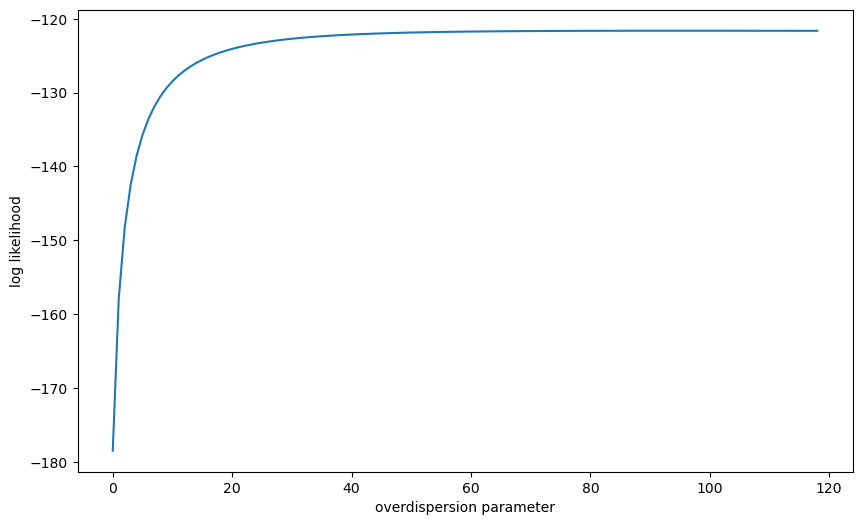

In [27]:
ds = np.arange(1,120)

logpdfs_along_d = [objective_overdispersion(-0.065,-0.046,d,agta_data) for d in ds]

best = max(logpdfs_along_d)
best_index = logpdfs_along_d.index(best)
best_d = ds[best_index]
print("best d:",best_d)

plt.plot(logpdfs_along_d)
plt.xlabel('overdispersion parameter')
plt.ylabel('log likelihood');

best d: 96


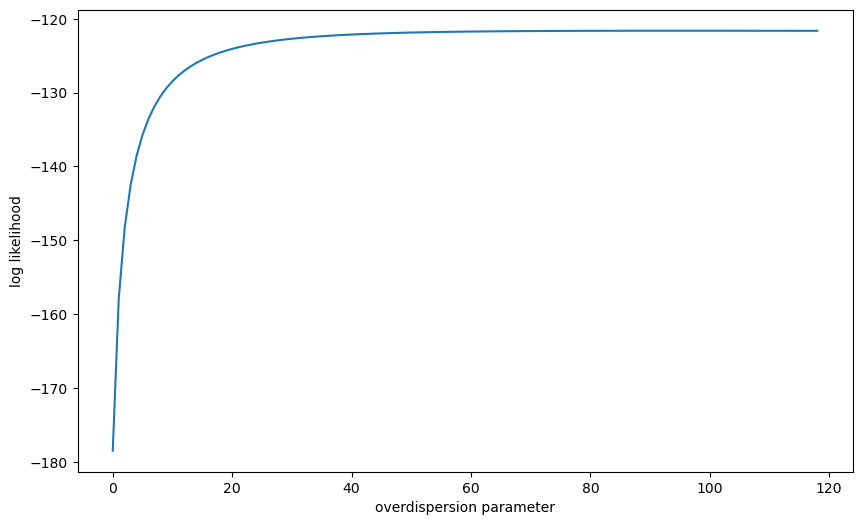

In [28]:
ds = np.arange(1,120)

logpdfs_along_d = [objective_overdispersion(0.1,-0.046,d,agta_data) for d in ds]

best = max(logpdfs_along_d)
best_index = logpdfs_along_d.index(best)
best_d = ds[best_index]
print("best d:",best_d)

plt.plot(logpdfs_along_d)
plt.xlabel('overdispersion parameter')
plt.ylabel('log likelihood');

In [29]:
a_grid = np.linspace(-0.2,0.3,101)
b_grid = np.linspace(-0.15,0.05,201)

In [30]:
# mle = grid_search_overdispersion(a_grid,b_grid,87,agta_data,True)
# mle.to_csv("likelihoods_table_darwin_token_proportion_agta_dispersion.csv")

In [31]:
mle = pd.read_csv("likelihoods_table_darwin_token_proportion_agta_dispersion.csv",index_col=0)
best = mle.max().max()
mle[mle.isin([best])].stack()

-0.200  -0.055   -121.620186
        -0.054   -121.620186
        -0.053   -121.620186
-0.195  -0.055   -121.620186
        -0.054   -121.620186
                     ...    
-0.070  -0.045   -121.620186
-0.065  -0.047   -121.620186
        -0.046   -121.620186
 0.095  -0.046   -121.620186
 0.100  -0.046   -121.620186
Length: 128, dtype: float64

So there are huge number of optima - 128 in fact.

## Agta results

[[ 0  0  0  1  1  1  1  2  2  2  2  3  3  3  4  4  4  4  5  5  5  5  6  6
   6  6  7  7  7  7  7  8  8  8  8  9  9  9  9  9 10 10 10 10 10 11 11 11
  11 11 12 12 12 12 12 13 13 13 13 13 14 14 14 14 14 15 15 15 15 15 15 16
  16 16 16 16 17 17 17 17 17 18 18 18 18 18 19 19 19 19 19 20 20 20 20 20
  21 21 21 21 21 22 22 22 22 22 23 23 23 23 23 24 24 24 24 25 25 25 25 25
  26 26 26 26 27 27 59 60]] [[ 95  96  97  95  96  97  98  95  96  97  98  96  97  98  96  97  98  99
   96  97  98  99  96  97  98  99  96  97  98  99 100  97  98  99 100  97
   98  99 100 101  97  98  99 100 101  97  98  99 100 101  98  99 100 101
  102  98  99 100 101 102  98  99 100 101 102  98  99 100 101 102 103  99
  100 101 102 103  99 100 101 102 103  99 100 101 102 103 100 101 102 103
  104 100 101 102 103 104 100 101 102 103 104 101 102 103 104 105 101 102
  103 104 105 102 103 104 105 102 103 104 105 106 102 103 104 105 103 104
  104 104]]
a - 95% credible interval: [ -0.18 0.26 ]
b - 95% credible interval: [ -

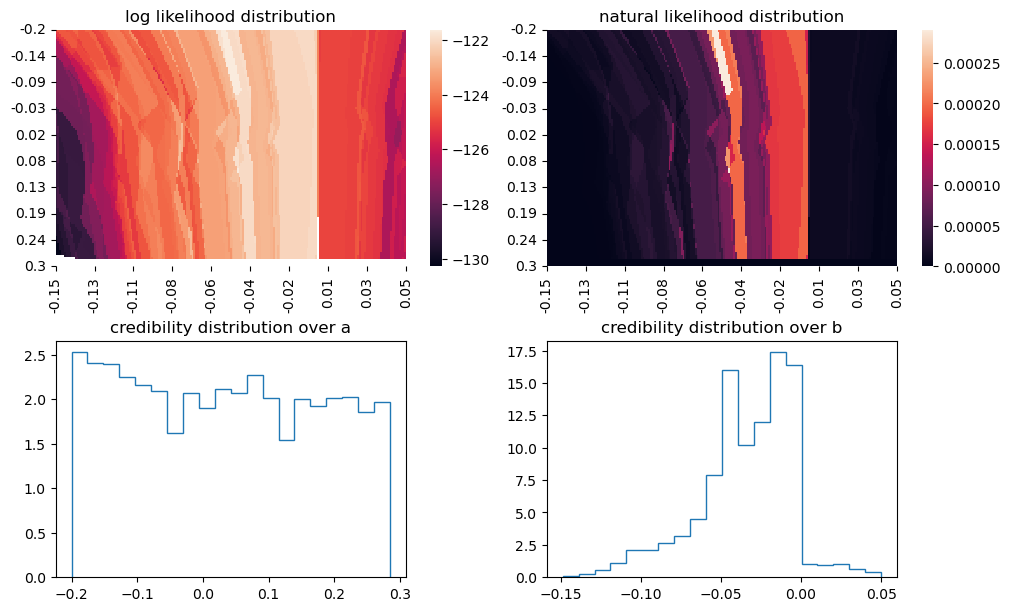

In [32]:
mle = pd.read_csv("likelihoods_table_darwin_token_proportion_agta_dispersion.csv",index_col=0)
f = analyze_grid(mle)

<Axes: title={'center': 'Joint likelihood distribution for parameters of the bargaining model'}, xlabel='Slope parameter', ylabel='Intercept parameter'>

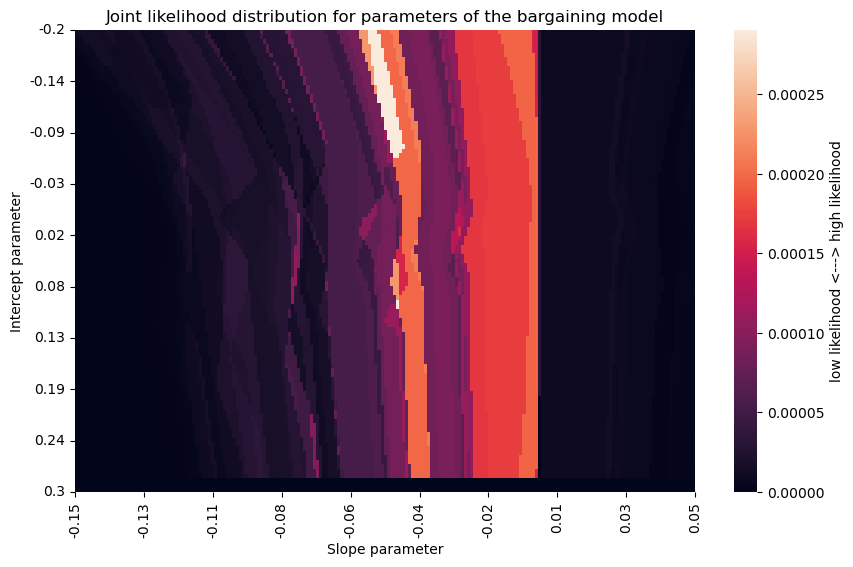

In [33]:
mle = pd.read_csv("likelihoods_table_darwin_token_proportion_agta_dispersion.csv",index_col=0)
analyze_grid_simple(mle)

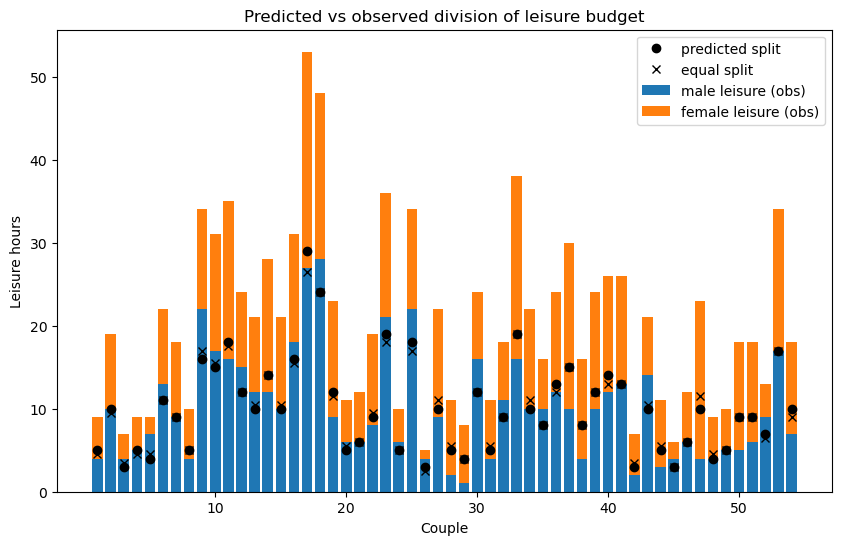

In [34]:
predicted_data = estimated_leisure_distribution(agta_data,-0.200,-0.055)
visualize_predictive_dist(predicted_data)

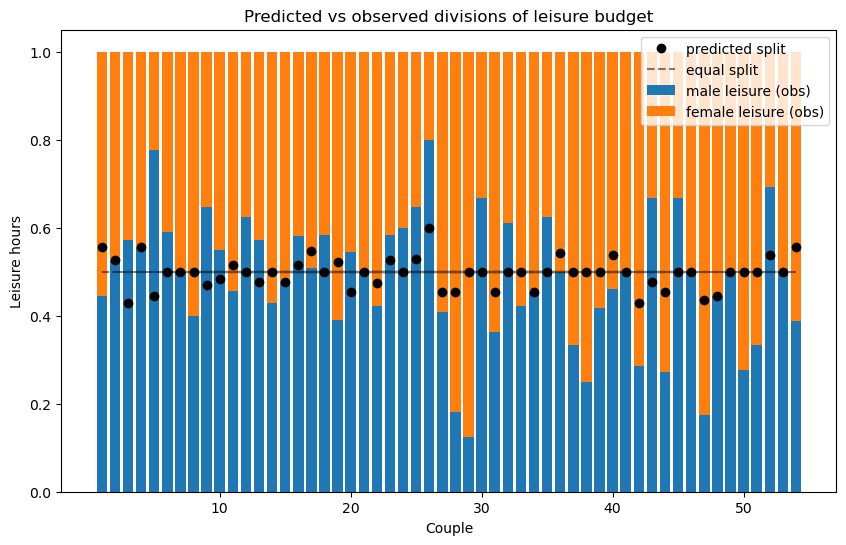

In [35]:
visualize_predictive_dist_residuals(predicted_data)

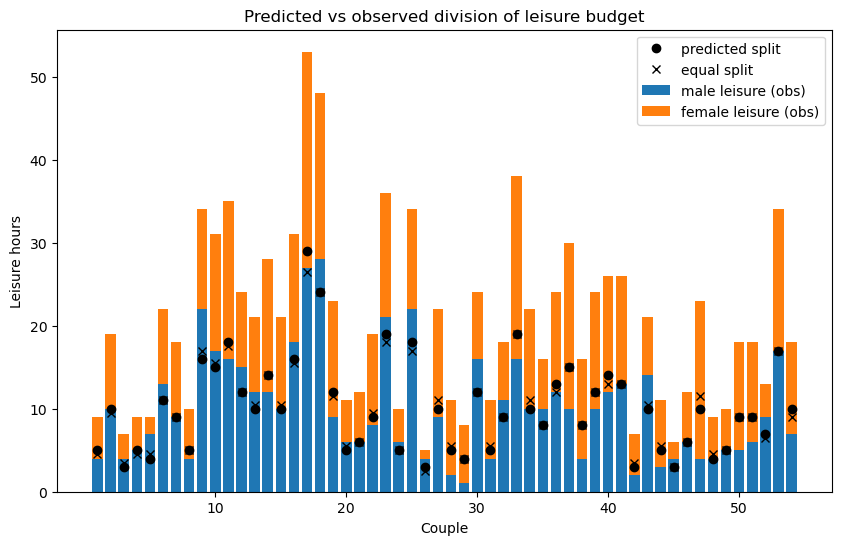

In [36]:
predicted_data = estimated_leisure_distribution(agta_data, 0.100,-0.046)
visualize_predictive_dist(predicted_data)

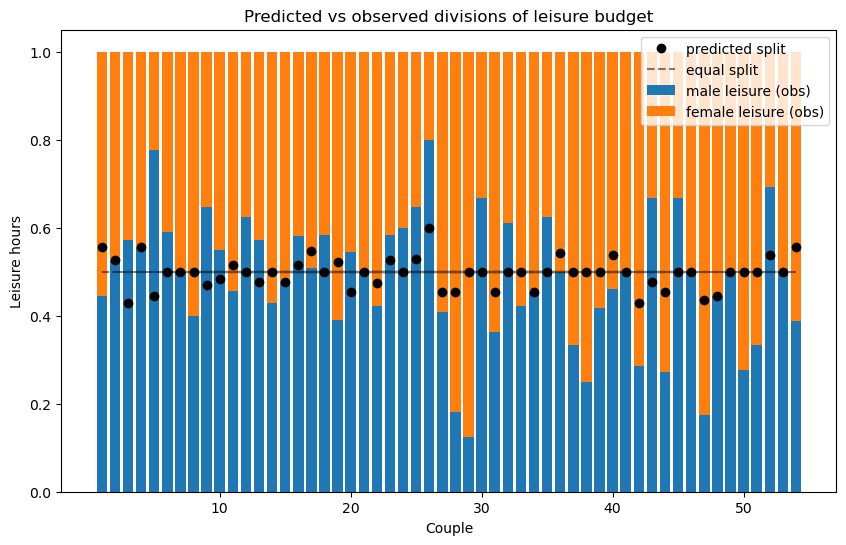

In [37]:
visualize_predictive_dist_residuals(predicted_data)

### Nonlinear predictions

In [38]:
male_z_relational = agta_data.male_z_relational.values
female_z_relational = agta_data.female_z_relational.values
budget = agta_data.budget.values

a, b = -0.200,-0.055

dp1 = (a + male_z_relational * b)
dp2 = (a + female_z_relational * b)

current_predictions = np.array([dynamic_solve(dp1[i],dp2[i],budget[i]) for i in range(len(budget))])

dp1 = (a + (male_z_relational + 1) * b)
dp2 = (a + female_z_relational * b)

cf_predictions = np.array([dynamic_solve(dp1[i],dp2[i],budget[i]) for i in range(len(budget))])

dp1 = (a + male_z_relational * b)
dp2 = (a + (female_z_relational + 1) * b)

cf2_predictions = np.array([dynamic_solve(dp1[i],dp2[i],budget[i]) for i in range(len(budget))])

diff_in_leisure_for_men = cf_predictions - current_predictions
diff_in_leisure_for_women = cf2_predictions - current_predictions

diff_in_leisure_for_men[:,0].mean(), diff_in_leisure_for_women[:,1].mean()

(-0.2777777777777778, -0.35185185185185186)

In [39]:
(diff_in_leisure_for_men[:,0].mean() + diff_in_leisure_for_women[:,1].mean()) / 2

-0.3148148148148148

In [40]:
((cf_predictions[:,0] / budget) - (current_predictions[:,0] / budget)).mean()

-0.014456371429628396

In [41]:
((cf2_predictions[:,1] / budget) - (current_predictions[:,1] / budget)).mean()

-0.018747424628490335

In [42]:
(((cf_predictions[:,0] / budget) - (current_predictions[:,0] / budget)).mean() + ((cf2_predictions[:,1] / budget) - (current_predictions[:,1] / budget)).mean()) / 2

-0.016601898029059366